## **Code playground for SDA sem 3**

### **Linear search**

Time complexity: *O(N)*

In [1]:
def linear_search(arr, X):
    for i in range(len(arr)):
        if arr[i] == X:
            return i

    return -1


arr = [9, 4, 3, 2, 6, 7, 1, 8, 5]
X = 6

Xi = linear_search(arr, X)
print(f"Found number {X} at index: {Xi}")

Found number 6 at index: 4


Similar implementation using enumerate:

In [2]:
def linear_search(sequence, target):
    for index, item in enumerate(sequence):
        if item == target:
            return index
    return -1


arr = [9, 4, 3, 2, 6, 7, 1, 8, 5]
X = 6

Xi = linear_search(arr, X)
print(f"Found number {X} at index: {Xi}")

Found number 6 at index: 4


### **Binary search**

Time complexity: *O(logN)*

In [3]:
def binary_search(arr, X):
    left = 0
    right = len(arr) - 1

    Xi = 0

    while left <= right:
        mid = left + (right - left) // 2

        if X <= arr[mid]:
            right = mid - 1
            Xi = mid
        else:
            left = mid + 1

    return Xi


arr = [10, 20, 30, 40, 50, 60, 70, 80, 90]  # is sorted
X = 60

Xi = binary_search(arr, X)
print(f"Found number {X} at index: {Xi}")

Found number 60 at index: 5


Note that to avoid overflow (in other programming languages) the calculation for the middle index is: *mid = left + (right - left) // 2* which is equal to *mid = (left + right) // 2*

Finding the **leftmost** element (if there are duplicates in the data):

In [4]:
def binary_search_leftmost(arr, X):
    left = 0
    right = len(arr) - 1

    Xi = len(arr) - 1

    while left <= right:
        mid = left + (right - left) // 2

        if X <= arr[mid]:
            right = mid - 1
            Xi = mid
        else:
            left = mid + 1

    return Xi


arr = [20, 20, 30, 40, 40, 40, 40, 60, 60, 60]  # is sorted
targets = [10, 20, 30, 40, 50, 60, 70]  # 10, 50, 70 are missing in the array

for X in targets:
    Xi = binary_search_leftmost(arr, X)
    print(f"Leftmost number {X} is at index: {Xi}")

Leftmost number 10 is at index: 0
Leftmost number 20 is at index: 0
Leftmost number 30 is at index: 2
Leftmost number 40 is at index: 3
Leftmost number 50 is at index: 7
Leftmost number 60 is at index: 7
Leftmost number 70 is at index: 9


Verbose version:

In [5]:
def binary_search_leftmost(arr, X):
    left = 0
    right = len(arr) - 1

    Xi = len(arr) - 1

    while left <= right:
        mid = left + (right - left) // 2
        print(f"X = {X}, arr[mid={mid}] = {arr[mid]}, Xi = {Xi}", arr[left : right + 1])

        if X <= arr[mid]:
            right = mid - 1
            Xi = mid
            print("New Xi is", Xi)
        else:
            left = mid + 1

    return Xi


arr = [20, 20, 30, 40, 40, 40, 40, 60, 60, 60]
X = 40

Xi = binary_search_leftmost(arr, X)
print(f"Leftmost number {X} is at index: {Xi}")

X = 40, arr[mid=4] = 40, Xi = 9 [20, 20, 30, 40, 40, 40, 40, 60, 60, 60]
New Xi is 4
X = 40, arr[mid=1] = 20, Xi = 4 [20, 20, 30, 40]
X = 40, arr[mid=2] = 30, Xi = 4 [30, 40]
X = 40, arr[mid=3] = 40, Xi = 4 [40]
New Xi is 3
Leftmost number 40 is at index: 3


Finding the **rightmost** element:

In [6]:
def binary_search_rightmost(arr, X):
    left = 0
    right = len(arr) - 1

    Xi = 0

    while left <= right:
        mid = left + (right - left) // 2

        if X < arr[mid]:  # If equal should drop the left (in the else).
            right = mid - 1
        else:
            left = mid + 1
            Xi = mid

    return Xi


arr = [20, 20, 30, 40, 40, 40, 40, 60, 60, 60]  # is sorted
targets = [10, 20, 30, 40, 50, 60, 70]  # 10, 50, 70 are missing in the array

for X in targets:
    Xi = binary_search_rightmost(arr, X)
    print(f"Rightmost number {X} is at index: {Xi}")

Rightmost number 10 is at index: 0
Rightmost number 20 is at index: 1
Rightmost number 30 is at index: 2
Rightmost number 40 is at index: 6
Rightmost number 50 is at index: 6
Rightmost number 60 is at index: 9
Rightmost number 70 is at index: 9


Verbose version:

In [7]:
def binary_search_rightmost(arr, X):
    left = 0
    right = len(arr) - 1

    Xi = 0

    while left <= right:
        mid = left + (right - left) // 2
        print(f"X = {X}, arr[mid={mid}] = {arr[mid]}, Xi = {Xi}", arr[left : right + 1])

        if X < arr[mid]:  # If equal should drop the left (in the else).
            right = mid - 1
        else:
            left = mid + 1
            Xi = mid
            print("New Xi is", Xi)

    return Xi


arr = [20, 20, 30, 40, 40, 40, 40, 60, 60, 60]
X = 40

Xi = binary_search_rightmost(arr, X)
print(f"Rightmost number {X} is at index: {Xi}")

X = 40, arr[mid=4] = 40, Xi = 0 [20, 20, 30, 40, 40, 40, 40, 60, 60, 60]
New Xi is 4
X = 40, arr[mid=7] = 60, Xi = 4 [40, 40, 60, 60, 60]
X = 40, arr[mid=5] = 40, Xi = 4 [40, 40]
New Xi is 5
X = 40, arr[mid=6] = 40, Xi = 5 [40]
New Xi is 6
Rightmost number 40 is at index: 6


Recursive version:

In [8]:
def binary_search_recursive(arr, X, left, right):
    if left <= right:
        mid = left + (right - left) // 2

        if X == arr[mid]:
            return mid
        elif X < arr[mid]:
            return binary_search_recursive(arr, X, left, mid - 1)
        else:
            return binary_search_recursive(arr, X, mid + 1, right)
    else:
        return -1


arr = [20, 20, 30, 40, 40, 40, 40, 60, 60, 60]
X = 40

Xi = binary_search_recursive(arr, X, 0, len(arr) - 1)
print(f"Number {X} is at index: {Xi}")

Number 40 is at index: 4


Using the *bisect* module:

In [9]:
import bisect

v = [1, 2, 3, 4, 4, 4, 6, 7, 8, 9]
targets = [0, 5, 6, 11, 4, -1]

for target in targets:
    print(bisect.bisect_left(v, target))
    print(bisect.bisect_right(v, target))
    print()

0
0

6
6

6
7

10
10

3
6

0
0



### **Ternary search**

Time complexity: *O(logN)*

In [10]:
def ternarySearch(arr, key, l, r):
    if r >= l:
        mid1 = l + (r - l) // 3
        mid2 = r - (r - l) // 3

        if arr[mid1] == key:
            return mid1

        if arr[mid2] == key:
            return mid2

        if key < arr[mid1]:
            return ternarySearch(arr, key, l, mid1 - 1)
        elif key > arr[mid2]:
            return ternarySearch(arr, key, mid2 + 1, r)
        else:
            return ternarySearch(arr, key, mid1 + 1, mid2 - 1)
    return -1


arr = [10, 20, 30, 40, 50, 60, 70, 80, 90]
X = 60

Xi = ternarySearch(arr, X, 0, len(arr) - 1)
print(f"Number {X} is at index: {Xi}")

Number 60 is at index: 5


Verbose variant:

In [11]:
def ternarySearch(arr, key, l, r):
    if r >= l:
        mid1 = l + (r - l) // 3
        mid2 = r - (r - l) // 3

        print(f"arr[mid1={mid1}] = {arr[mid1]}, arr[mid2={mid2}] = {arr[mid2]}", arr[l : r + 1])

        if arr[mid1] == key:
            return mid1

        if arr[mid2] == key:
            return mid2

        if key < arr[mid1]:
            return ternarySearch(arr, key, l, mid1 - 1)
        elif key > arr[mid2]:
            return ternarySearch(arr, key, mid2 + 1, r)
        else:
            return ternarySearch(arr, key, mid1 + 1, mid2 - 1)
    return -1


arr = [i for i in range(100)]
# arr = [10, 20, 20, 30, 40, 40, 40, 40, 60, 60, 60, 60, 60, 60]

X = 60

Xi = ternarySearch(arr, X, 0, len(arr) - 1)
print(f"Number {X} is at index: {Xi}")

arr[mid1=33] = 33, arr[mid2=66] = 66 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
arr[mid1=44] = 44, arr[mid2=55] = 55 [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
arr[mid1=59] = 59, arr[mid2=62] = 62 [56, 57, 58, 59, 60, 61, 62, 63, 64, 65]
arr[mid1=60] = 60, arr[mid2=61] = 61 [60, 61]
Number 60 is at index: 60


### **Jump search**

Time complexity: *O(sqrt(N))*

In [12]:
import math


def jumpSearch(arr, X):
    N = len(arr)
    block_size = int(math.sqrt(N))

    step = block_size
    prev = 0
    while arr[min(step, N) - 1] < X:
        prev = step
        step += block_size
        if prev >= N:
            return -1

    while arr[prev] < X:
        prev += 1

        if prev == min(step, N):
            return -1

    if arr[prev] == X:
        return prev

    return -1


arr = [10, 20, 30, 40, 50, 60, 70, 80, 90]
X = 40

Xi = jumpSearch(arr, X)
print(f"Number {X} is at index: {Xi}")

Number 40 is at index: 3


Verbose version:

In [13]:
import math


def jumpSearch(arr, X):
    N = len(arr)
    block_size = int(math.sqrt(N))
    print(f"Len is {N}, blocksize is: {block_size}")

    step = block_size
    prev = 0
    while arr[min(step, N) - 1] < X:
        print(f"Number on step {min(step, N)}: {arr[min(step, N) - 1]}")

        prev = step
        step += block_size

        if prev >= N:
            print(f"Number is larger than max element")
            return -1

    print(f"Number on last step {min(step, N)}: {arr[min(step, N) - 1]}")
    print(f"Interval is: [{arr[prev]}, {arr[min(step, N) - 1]})")

    while arr[prev] < X:
        print(f"Linear searching:", arr[prev])
        prev += 1

    if prev == min(step, N):
        print(f"End of interval reached!*", arr[prev])
        return -1

    print(f"End of linear searching on number:", arr[prev])
    if arr[prev] == X:
        return prev

    return -1


arr = [i for i in range(0, 100, 3)]
print(arr)
X = 66  # Try 66, 59, 67, 120, -1

Xi = jumpSearch(arr, X)
print(f"Number {X} is at index: {Xi}")

[0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51, 54, 57, 60, 63, 66, 69, 72, 75, 78, 81, 84, 87, 90, 93, 96, 99]
Len is 34, blocksize is: 5
Number on step 5: 12
Number on step 10: 27
Number on step 15: 42
Number on step 20: 57
Number on last step 25: 72
Interval is: [60, 72)
Linear searching: 60
Linear searching: 63
End of linear searching on number: 66
Number 66 is at index: 22


### **Exponential search**

Time complexity: *O(logi)*

In [14]:
def binary_search_recursive(arr, X, left, right):
    if left <= right:
        mid = left + (right - left) // 2

        if X == arr[mid]:
            return mid
        elif X < arr[mid]:
            return binary_search_recursive(arr, X, left, mid - 1)
        else:
            return binary_search_recursive(arr, X, mid + 1, right)
    else:
        return -1


def exponential_search(arr, X):
    N = len(arr)

    i = 1
    while i < N and arr[i] <= X:
        i = i * 2

    left = i // 2
    right = min(i, N - 1)

    return binary_search_recursive(arr, X, left, right)


arr = [10, 20, 30, 40, 50, 60, 70, 80, 90]
X = 60

Xi = exponential_search(arr, X)
print(f"Number {X} is at index: {Xi}")

Number 60 is at index: 5


Verbose version:

In [15]:
def exponential_search(arr, X):
    N = len(arr)

    i = 1
    while i < N and arr[i] <= X:
        print(i, arr[i])
        i = i * 2

    print("Last:", i, arr[min(i, N - 1)])

    left = i // 2
    right = min(i, N - 1)

    print("Number is between indexes:", left, right)
    print("Number is between:", arr[left], arr[right])

    print("Binary searching...")

    return binary_search_recursive(arr, X, left, right)


arr = [10, 20, 30, 40, 50, 60, 70, 80, 90]
arr = [i for i in range(0, 100, 5)]

print(len(arr), arr)
X = 60

Xi = exponential_search(arr, X)
print(f"Number {X} is at index: {Xi}")

20 [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
1 5
2 10
4 20
8 40
Last: 16 80
Number is between indexes: 8 16
Number is between: 40 80
Binary searching...
Number 60 is at index: 12


### **Binary search on monotonic function**

Suppose we have the following function (the input x can only be whole a number):


In [ ]:
def f(x):
    return 2 * x**3 + 13 * x**2 + 3 * x + 5

Let's plot this function and see how it looks:

<Axes: xlabel='x'>

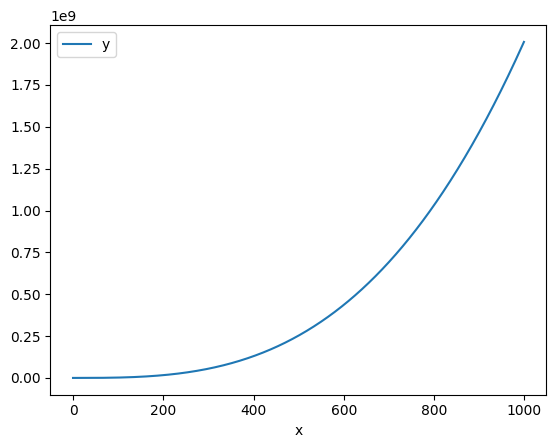

In [17]:
import pandas as pd

f_input = [i for i in range(1_000)]

pd.DataFrame.from_dict({"x": f_input, "y": map(f, f_input)}).plot(x="x", y="y")

Looks like it is growing fast, but it looks like it's monotonic...
How can we know, what is the smallest x, for which f(x) >= 2000013000003000006?
We can do a linear search:

In [18]:
def linear_search_f(f, target=2000013000003000006):
    i = 0
    while True:
        if f(i) >= target:
            return i
        i += 1


linear_search_f(f)

1000001

But can't we also do a binary search? The values of the function would be corresponding to a sorted array, which we know we can search in... Let's see:

In [19]:
def binary_search_f(f, target=2000013000003000006):
    left, right, ans = 0, int(1e16), -1
    while left <= right:
        mid = (left + right) // 2
        if f(mid) >= target:
            right = mid - 1
            ans = mid
        else:
            left = mid + 1

    return ans


binary_search_f(f)

1000001

In [20]:
%timeit linear_search_f(f)
%timeit binary_search_f(f)

607 ms ± 18.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
37.9 µs ± 459 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


*Real-life example:*

Suppose we have 3 cooks, every one of them is cooking 1 pancake for every 2, 3, 5 minutes respectively, that have passed. How can we find what is the first moment that we have more than 1,000,000 pancakes ready? How would our function look like?

In [21]:
def f_pancakes(t, cooks=[2, 3, 5]):
    return sum([t // cook for cook in cooks])


f_pancakes(5)

4

In moment 5, we have 4 pancakes, the first cook has cooked 2, the second has cooked 1, and the third has also cooked 1.

Let's plot the function and analyze it...

<Axes: xlabel='x'>

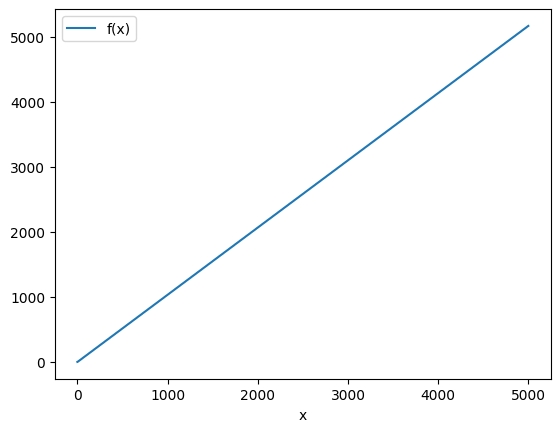

In [22]:
pancakes_input = [i for i in range(5_000)]

pd.DataFrame.from_dict({"x": pancakes_input, "f(x)": map(f_pancakes, pancakes_input)}).plot(x="x", y="f(x)")

Looks like it is monotonic as well, meaning that we can do a binary search over it... But let's do a linear search first to compare for correctness.

Now let's do a binary search over this function, in fact, let's reuse the function that we have written above...

In [23]:
print(linear_search_f(f_pancakes, 1_000_000))
print(binary_search_f(f_pancakes, 1_000_000))

967743
967743


Looks like they are giving the same answers... Let's time them:

In [24]:
%timeit linear_search_f(f_pancakes, 1_000_000)
%timeit binary_search_f(f_pancakes, 1_000_000)

369 ms ± 3.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
26.1 µs ± 498 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
